<a href="https://colab.research.google.com/github/RenatevanKempen/Python-in-Power-BI/blob/main/Predicting_with_Power_BI_Fiat500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://baime.nl/wp-content/uploads/2020/12/cropped-Social-Media-Kit-1.jpg" alt="Logo B.A.I.M.E" width="200"/>

# **Predicting Fiat500 used car prices**

<img src="https://cdn.pixabay.com/photo/2017/09/05/08/55/isolated-2716838_960_720.png" alt="Fiat500" width="200"/>

# The situation explained

In this notebook we look at the data we got via this [Kaggle dataset](https://www.kaggle.com/paolocons/small-dataset-about-used-fiat-500-sold-in-italy/code).

We will see if we can predict the sales price of a used Fiat 500 car.

We will explore the dataset given, check the various features we have and we will make an algorithm that can predict the sales price of the car.

# 1. Import the important libraries / packages
These packages are needed to load and use the dataset

In [ ]:
import pandas as pd #we use this to load, read and transform the dataset
import numpy as np #we use this for statistical analysis
import matplotlib.pyplot as plt #we use this to visualize the dataset
import seaborn as sns #we use this to make countplots
import sklearn.metrics as sklm #This is to test the models

1b. Mount your drive to access the data properly from your drive

In [ ]:
# You will need to mount your drive using the following commands:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#here we load the train data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PowerBI training/Used_fiat_500_in_Italy_dataset.csv')

#and immediately I would like to see how this dataset looks like
data.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


In [ ]:
#now let's look closer at the dataset we got
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [ ]:
data.shape

(380, 9)

In [ ]:
data.describe()

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


In [ ]:
#find out the unique values of the engine power
print(data['engine_power'].unique())

[ 69  99 101  84]


In [ ]:
#Let's see what the options are in the model column (the objects)
print(data['model'].unique())

['pop' 'lounge' 'sport' 'star']


In [ ]:
#Let's see what the options are in the transmission column (the objects)
print(data['transmission'].unique())

['manual' 'automatic']


# 2. Explore the dataset

## Price in the dataset
As this is the column we would like to predict, let's look closer to this column.

(array([ 33., 240.,  26.,  16.,  11.,  36.,  12.,   5.,   0.,   1.]),
 array([ 2890.,  4191.,  5492.,  6793.,  8094.,  9395., 10696., 11997.,
        13298., 14599., 15900.]),
 <a list of 10 Patch objects>)

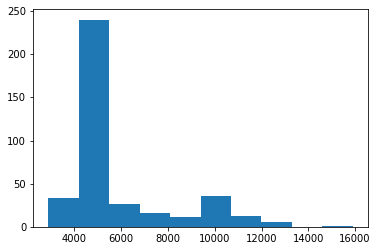

In [ ]:
#Now let's try a histogram
plt.hist(data['price'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f980bdb6e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f980bdbee90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f980bdc5ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f980bdc5990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f980bdbe410>,
  <matplotlib.lines.Line2D at 0x7f980bdbe950>]}

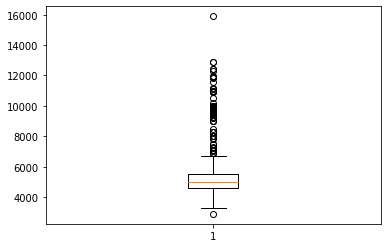

In [ ]:
#Now we will try a Box & Wiskers plot
plt.boxplot(data['price'])

You can see an outlier around 16.000 euro. Let's look closer at this outlier

In [ ]:
outliers = data[data['price'] > 14000]
outliers.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
97,pop,69,manual,91,56779,1,45.580879,12.36937,15900


price is for a pop model, let's look more closely to the price range per model type

In [ ]:
#first let's set the model column as categorical
data['model'] = data['model'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   model            380 non-null    category
 1   engine_power     380 non-null    int64   
 2   transmission     380 non-null    object  
 3   age_in_days      380 non-null    int64   
 4   km               380 non-null    int64   
 5   previous_owners  380 non-null    int64   
 6   lat              380 non-null    float64 
 7   lon              380 non-null    float64 
 8   price            380 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 24.4+ KB


Text(0.5, 0.98, 'Categorical Plotting')

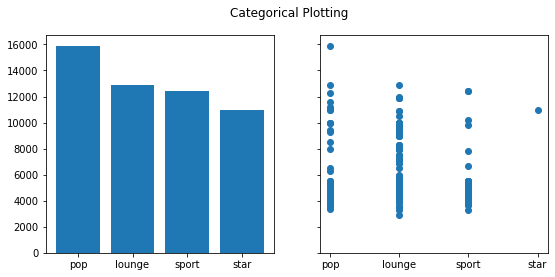

In [ ]:
#next let's plot per category how the data distribution looks like
models = list(data['model'])
values = list(data['price'])

fig, axs = plt.subplots(1, 2, figsize=(9,4), sharey=True)
axs[0].bar(models, values)
axs[1].scatter(models, values)
fig.suptitle('Categorical Plotting')

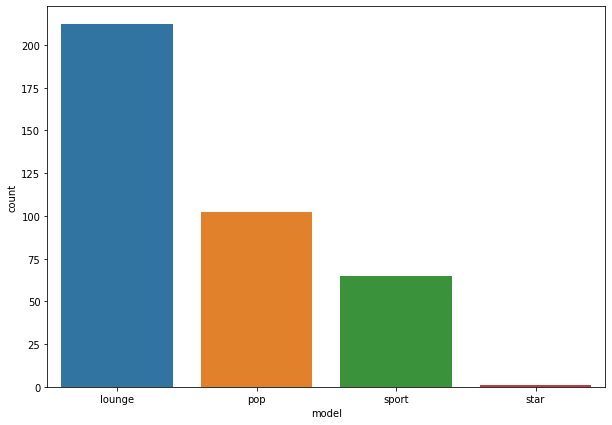

In [ ]:
#Make a countplot to see how many models are sold
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'model', data=data)

Looks like lounge is the most sold type of model and there is only one star model in this dataset.
Let's look into this star model more closely.

In [ ]:
star = data[data['model'] == 'star']
star.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
83,star,69,manual,275,7900,1,45.351528,10.84409,10990


There is indeed only one star model in this dataset. 

# 3. Make all columns numeric
We need to make all column input numeric to use them further on. 
This is what we will do now. 

In [ ]:
#the only two columns that are not numeric are 'model' and ' transmission'.
#to show how we have changed the values, let's encode this manually
model_dict = {'pop':4, 'lounge':3, 'sport':2, 'star':1}
data['model'].replace(model_dict, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    int64  
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 26.8+ KB


In [ ]:
#the only two columns that are not numeric are 'model' and ' transmission'.
#to show how we have changed the values, let's encode this manually
trans_dict = {'manual':1, 'automatic':2}
data['transmission'].replace(trans_dict, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    int64  
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    int64  
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 26.8 KB


# 4. Most important features
Let's continue by looking at the most important features according to three different tests. 
Than we will use the top ones to train and test our first model. 

In [ ]:
#First we need to split the dataset in the y-column (the target) and the components (X), the independent columns. 
#This is needed as we need to use the X columns to predict the y in the model. 

y = data['price'] #the column we want to predict 
X = data.drop(labels = ['price'], axis = 1)  #independent columns 

In [ ]:
#as Longitude and latitude are features which need to be combined to have an influence, we will drop them for now. 
X = X.drop(labels = ['lon', 'lat'], axis =1)

[0.06806913 0.04071296 0.01675073 0.37429274 0.44784391 0.05233052]


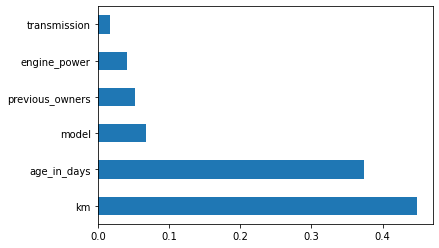

In [ ]:
#TEST 1 - ExtraTreesClassifier - GOOD IF YOU USE DECISION TREE MODELS
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#TEST 2 - SelectKBest - GOOD IF YOU USE A K-NEAREST NEIGHBOR MODEL
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Name of the column         Score
4                 km  6.315350e+06
3        age_in_days  2.179288e+05
1       engine_power  1.257475e+02
5    previous_owners  2.891261e+01
0              model  1.593983e+01
2       transmission  9.537323e+00


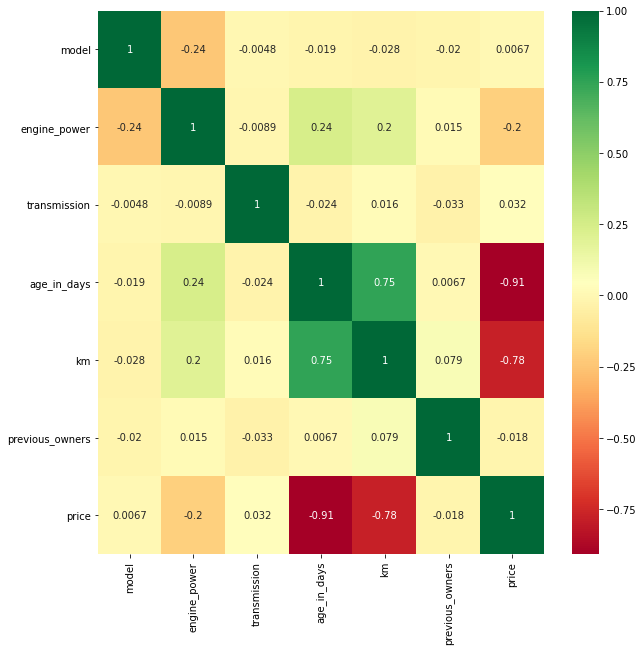

In [ ]:
#TEST 3 - Correlations - Linear and logistic regression like correlated data to have a good prediction
#get correlations of each features in dataset
corrmat = data.drop(labels =['lon', 'lat'], axis = 1) #this is because it is the original target column and therefore has a high correlation with our percentage column
corrmat = corrmat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Seems that Age in days and km have a strong negative relationship to the price of the car, which is very logical, as the older the car, the less it's worth. 

Also age and km have a strong positive relationship, which is also logical, as the older the car the more likely it has ran more km. 

In [ ]:
#let's keep all features for now. 

# 5. Machine learning Model
As we would like to predict a continuous number, the price, we would use a Linear Regression model here. 

In [ ]:
#Load the chosen model here
from sklearn.linear_model import LinearRegression

## 5a. Split the dataset in train and test

Before we are going to use the models choosen, we will first split the dataset in a train and test set.
This because we want to test the performance of the model on the training set and to be able to check it's accuracy. 

In [ ]:
from sklearn.model_selection import train_test_split

#First try with all features

#I want to withhold 35 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.35 , random_state = 25)

In [ ]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (247, 6)
Shape of X_test is:  (133, 6)
Shape of Y_train is:  (247,)
Shape of y_test is:  (133,)


## 5b. Make a check for the model

In [ ]:
#To check the model, I want to build a check:
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj)) #This is the number we will be focussing on. 
    #A good model would have an adjusted R2 of >70%, a bad model below this. 
    

## 5c. Fit and check the Linear regression model

In [ ]:
# Linear regression model
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Now let's see how this model performs
Predictions = model.predict(X_test)
print_metrics(y_test, Predictions, 6)

Mean Square Error      = 855710.9048452273
Root Mean Square Error = 925.0464338860116
Mean Absolute Error    = 615.8743867209411
Median Absolute Error  = 469.42144369705693
R^2                    = 0.7983534747622291
Adjusted R^2           = 0.7904146351859389


# Conclusion

As you can see here, we have an adjusted R2 of 79%, so this model is not bad to predict the prices. 